In [1]:
import sys, os
if os.path.abspath(os.pardir) not in sys.path:
    sys.path.insert(0, os.path.abspath(os.pardir))
import CONFIG
%reload_ext autoreload
%autoreload 2

In [18]:
import numpy as np
import pandas as pd
import torch
import pydicom
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = CONFIG.CFG.DATA.BASE
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

In [26]:
TRAIN_PATIENTS = train_df['Patient'].unique().tolist()
TEST_PATIENTS = test_df['Patient'].unique().tolist()

In [15]:
path = os.path.join(DATA_DIR, "train", TRAIN_PATIENTS[0])
slices = [pydicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))

In [23]:
slices[0].pixel_array.shape

(512, 512)

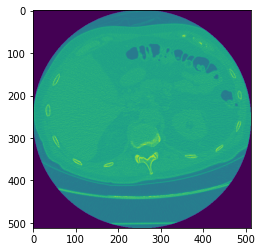

In [19]:
plt.imshow(slices[0].pixel_array)
plt.show()

In [27]:
least = float('inf')
for id in TEST_PATIENTS:
    if len(os.listdir(os.path.join(DATA_DIR, "test", id))) < least:
        least = len(os.listdir(os.path.join(DATA_DIR, "test", id)))

print(least)

28
